In [3]:

import numpy as np

from lmfit import Parameters, Minimizer, fit_report, conf_interval, report_ci
import matplotlib.pyplot as plt
from matplotlib import cycler



def volume_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    return a0*np.exp( a1*a2/(np.exp(a2/x)-1)
                     +a3*a4/(np.exp(a4/x)-1)
                     +a5*a6/(np.exp(a6/x)-1)
                     +a7*a8/(np.exp(a8/x)-1))

def CET_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    CTE =   (((a1*a2**2.0*np.exp(a2/x))/((x**2.0)*(np.exp(a2/x)-1)**2.0))
            +((a3*a4**2.0*np.exp(a4/x))/((x**2.0)*(np.exp(a4/x)-1)**2.0))
            +((a5*a6**2.0*np.exp(a6/x))/((x**2.0)*(np.exp(a6/x)-1)**2.0))
            +((a7*a8**2.0*np.exp(a8/x))/((x**2.0)*(np.exp(a8/x)-1)**2.0))
           )/1000
    return CTE

def CET_numerical(T,V):
    #linear extrapolation of volume at T=0
    v0 = V[0]-((V[1]-V[0])/(T[1]-T[0]))*T[0]
    T = np.insert(T, 0, 0.0)
    V = np.insert(V, 0, v0)
    CET = [0.0]
    for i in range(1,len(T)):
        CET.append((1.0/V[i])*(V[i]-V[i-1])/(T[i]-T[i-1]))
    return np.array(CET[1:])

def func2min2(params, T, V):
    parametros = [params[k] for k in params.keys()]
    model_vol = volume_fcn2(T, *parametros)
    residual_vol = model_vol - V  
    return residual_vol

def fit_volume_vs_temperature2(T, V, verbose=True):
    params = Parameters()
    params.add('a0', value=7000, min=0, max=9000, vary=True)
    params.add('a1', value=0.1, min=-50, max=50, vary=True)
    params.add('a2', value=0.01, min=0.001,max=3.5, vary=True)
    params.add('a3', value=0.1, min=-50, max=50, vary=True)
    params.add('a4', value=0.1, min=0.001,max=3.5, vary=True)
    params.add('a5', value=0., min=-100, max=100,vary=False)
    params.add('a6', value=1., min=0.001,max=3.5,vary=False)
    params.add('a7', value=0., min=-100, max=100,vary=False)
    params.add('a8', value=1., min=0.001,max=3.5,vary=False)
  
    minimizer = Minimizer(func2min2, params, fcn_args=(T, V))
    fit_kws = {'totaliter': 30,
               'maxiter': 6,
               'local': 'L-BFGS-B',
               'tabulistsize': 8,}
    out = minimizer.minimize(method='ampgo')#, **kws) 
    fit = func2min2(out.params, T, V)
    if verbose:
        print(fit_report(out), flush=True)
        print('Cost:',np.sum(fit))
        print('---------- DE bounds ----------')
        for k in out.params.keys():
            print('{0:3}:  {1: >8}\t{2: >12.6g}\t{3: >8}'.format(k,out.params[k].min,out.params[k].value,out.params[k].max))
        
    return out

def second_fit2(T,V,out, verbose=True):
    minimizer = Minimizer(func2min2, out.params, fcn_args=(T, V))
    result2 = minimizer.minimize(method='nelder')
    if verbose:
        print(fit_report(result2), flush=True)
    return result2


def plot2(x_data, y_data, x_fit, y_fit, z_data, z_fit, file):
    plt.rcParams['font.sans-serif'] = "Quattrocento"
    plt.rcParams['font.family'] = "sans-serif"
    #plt.rcParams['axes.prop_cycle'] = plt.cycler('color', ["999999", "e69f00", "56b4e9", "009e73", "f0e442", "0072b2", "d55e00", "cc79a7"])
    plt.rcParams['savefig.bbox'] = 'tight'
    
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,dpi=120,figsize=(8,3))
    ax1.plot(x_data, y_data, 'o', label='MD simulation', ms=4)
    ax1.plot(x_fit, y_fit, '-',label='Fit')
    ax1.set_ylabel('Volume (Å$^3$)')
    ax1.set_xlabel('Temperature (K)')
    ax1.legend()
    ax2.plot(x_data, 1e6*z_data, '+',label='Finite differences')
    ax2.plot(x_fit, 1e6*z_fit, label='Analytic')
    ax2.set_xlabel('Temperature (K)')
    ax2.set_ylabel('Volumetric thermal expansion\ncoefficient (10$^{-6}$K$^{-1}$)')
    ax2.legend()
    plt.suptitle(file, fontsize=8)
    plt.savefig(file.rstrip('dat')+'pdf')
    plt.show()

In [1]:
import numpy as np
from lmfit import Parameters, Minimizer, fit_report, conf_interval, report_ci
import matplotlib.pyplot as plt
from matplotlib import cycler

def volume_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    return a0*np.exp( a1*a2/(np.exp(a2/x)-1)
                     +a3*a4/(np.exp(a4/x)-1)
                     +a5*a6/(np.exp(a6/x)-1)
                     +a7*a8/(np.exp(a8/x)-1))

def CET_fcn2(T, a0, a1, a2, a3, a4, a5, a6, a7, a8):
    x = T/1000
    CET =   (((a1*a2**2.0*np.exp(a2/x))/((x**2.0)*(np.exp(a2/x)-1)**2.0))
            +((a3*a4**2.0*np.exp(a4/x))/((x**2.0)*(np.exp(a4/x)-1)**2.0))
            +((a5*a6**2.0*np.exp(a6/x))/((x**2.0)*(np.exp(a6/x)-1)**2.0))
            +((a7*a8**2.0*np.exp(a8/x))/((x**2.0)*(np.exp(a8/x)-1)**2.0))
           )/1000
   
    return CET

def CET_numerical(T,V):
    #linear extrapolation of volume at T=0
    v0 = V[0]-((V[1]-V[0])/(T[1]-T[0]))*T[0]
    T = np.insert(T, 0, 0.0)
    V = np.insert(V, 0, v0)
    CET = [0.0]
    for i in range(1,len(T)):
        CET.append((1.0/V[i])*(V[i]-V[i-1])/(T[i]-T[i-1]))
    return np.array(CET[1:])

def func2min2(params, T, V):
    parametros = [params[k] for k in params.keys()]
    model_vol = volume_fcn2(T, *parametros)
    residual_vol = model_vol - V  
    return residual_vol

def fit_volume_vs_temperature2(T, V, verbose=True):
    params = Parameters()
    params.add('a0', value=3500, min=0, max=5000, vary=True)
    params.add('a1', value=0.1, min=-5, max=5, vary=True)
    params.add('a2', value=0.01, min=0.001,max=3.5, vary=True)
    params.add('a3', value=0.1, min=-50, max=50, vary=True)
    params.add('a4', value=0.1, min=0.001,max=3.5, vary=True)
    params.add('a5', value=0., min=-100, max=100,vary=True)
    params.add('a6', value=1., min=0.001,max=3.5,vary=True)
    params.add('a7', value=0., min=-100, max=100,vary=False)
    params.add('a8', value=1., min=0.001,max=3.5,vary=False)
  
    minimizer = Minimizer(func2min2, params, fcn_args=(T, V))
    kws = {'local':'L-BFGS-B', 'totaliter': 20, 'maxiter':5, 'maxfunevals':50000000}    
    out = minimizer.minimize(method='ampgo', **kws) 
    fit = func2min2(out.params, T, V)
    if verbose:
        print(fit_report(out), flush=True)
        print('Cost:',np.sum(fit))
        print('---------- DE bounds ----------')
        for k in out.params.keys():
            print('{0:3}:  {1: >8}\t{2: >12.6g}\t{3: >8}'.format(k,out.params[k].min,out.params[k].value,out.params[k].max))
        
    return out

def second_fit2(T,V,out, verbose=True):
    minimizer = Minimizer(func2min2, out.params, fcn_args=(T, V))
    result2 = minimizer.minimize(method='nelder')
    if verbose:
        print(fit_report(result2), flush=True)
    return result2

def plot2(x_data, y_data, x_fit, y_fit, z_data, z_fit, file):
    plt.rcParams['font.sans-serif'] = "Quattrocento Sans"
    plt.rcParams['font.family'] = "sans-serif"
    plt.rcParams['axes.prop_cycle'] = cycler('color', ["999999", "e69f00", "56b4e9", "009e73", "f0e442", "0072b2", "d55e00", "cc79a7"])
    plt.rcParams['savefig.bbox'] = 'tight'
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,dpi=120,figsize=(10,3))
    ax1.plot(x_data, y_data, 'o', label='MD simulation')
    ax1.plot(x_fit, y_fit, '-',label='Fit')
    ax1.set_ylabel('Volume (Å$^3$)')
    ax1.set_xlabel('Temperature (K)')
    ax1.legend()
    
    ax2.plot(x_data, 1e6*z_data, '+',label='Finite differences')
    ax2.plot(x_fit, 1e6*z_fit, label='Analytic')
    ax2.set_xlabel('Temperature (K)')
    ax2.set_ylabel('Volumetric thermal expansion\ncoefficient (10$^{-6}$K$^{-1}$)')
    ax2.legend()
    plt.suptitle(file.rstrip('.dat'), fontsize=8)
    plt.tight_layout()
    plt.savefig(file.rstrip('dat')+'pdf')
    plt.show()

######################### ./volume_vs_temperature.dat ##########################
Fitting 1


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 51408
    # data points      = 50
    # variables        = 7
    chi-square         = 4.3513e-05
    reduced chi-square = 1.0119e-06
    Akaike info crit   = -683.723800
    Bayesian info crit = -670.339639
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1972349 +/- 2.0408e-04 (0.00%) (init = 3500)
    a1:  4.13564026 +/- 0.15782798 (3.82%) (init = 0.1)
    a2:  2.40934787 +/- 0.01900482 (0.79%) (init = 0.01)
    a3:  27.1246648 +/-        nan (nan%) (init = 0.1)
    a4:  2.68561493 +/- 0.02634262 (0.98%) (init = 0.1)
    a5: -30.8703358 +/-        nan (nan%) (init = 0)
    a6:  2.63606598 +/- 0.02482248 (0.94%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a6) =  1.020
    C(a2, a4) =  0.935
    C(a2, a6) =  0.919
    C(a1, a2) =  0.360
    C(a0, a2) =  0.209
    C(a1, a4) =  0.202
   

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


    Better solution found. Cost:0.11384194627687805
Fitting 2
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 57960
    # data points      = 50
    # variables        = 7
    chi-square         = 1.0179e-05
    reduced chi-square = 2.3673e-07
    Akaike info crit   = -756.358484
    Bayesian info crit = -742.974323
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1965904 +/- 1.0959e-04 (0.00%) (init = 3500)
    a1:  4.08321514 +/- 0.09027391 (2.21%) (init = 0.1)
    a2:  2.10252356 +/- 0.00846170 (0.40%) (init = 0.01)
    a3: -49.9934142 +/-        nan (nan%) (init = 0.1)
    a4:  1.98680265 +/- 0.00318127 (0.16%) (init = 0.1)
    a5:  45.9904267 +/- 0.09406459 (0.20%) (init = 0)
    a6:  1.97823097 +/- 0.00309146 (0.16%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a5) = -0.999
    C(a4, a6) =  0.997
    C(a2, a4) =  0.775
    C(a2,

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


Fitting 3
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 57552
    # data points      = 50
    # variables        = 7
    chi-square         = 5.4746e-05
    reduced chi-square = 1.2732e-06
    Akaike info crit   = -672.241493
    Bayesian info crit = -658.857332
[[Variables]]
    a0:  46.1973687 +/- 2.3890e-04 (0.00%) (init = 3500)
    a1:  0.65948256 +/- 0.09372563 (14.21%) (init = 0.1)
    a2:  1.80674876 +/- 0.05315087 (2.94%) (init = 0.01)
    a3: -0.63813586 +/- 0.08940964 (14.01%) (init = 0.1)
    a4:  1.82722724 +/- 0.05608593 (3.07%) (init = 0.1)
    a5: -0.02482375 +/- 0.00421811 (16.99%) (init = 0)
    a6:  2.59057907 +/- 0.17895381 (6.91%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a5, a6) = -5.309
    C(a3, a5) =  1.224
    C(a3, a6) =  1.200
    C(a1, a6) = -1.032
    C(a1, a3) = -1.005
    C(a1, a5) = -1.005
    C(a2, a4) =  0.999
    C(a4, a5) = 

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 66056
    # data points      = 50
    # variables        = 7
    chi-square         = 6.5803e-05
    reduced chi-square = 1.5303e-06
    Akaike info crit   = -663.043636
    Bayesian info crit = -649.659475
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1970032 +/- 2.4860e-04 (0.00%) (init = 3500)
    a1:  4.78264748 +/- 0.05013667 (1.05%) (init = 0.1)
    a2:  2.30194815 +/- 0.02120529 (0.92%) (init = 0.01)
    a3: -34.1735469 +/-        nan (nan%) (init = 0.1)
    a4:  2.44473802 +/- 0.02116314 (0.87%) (init = 0.1)
    a5:  29.4851430 +/-        nan (nan%) (init = 0)
    a6:  2.47153852 +/- 0.02124051 (0.86%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a6) =  0.997
    C(a2, a4) =  0.958
    C(a2, a6) =  0.931
    C(a0, a2) =  0.292
    C(a0, a4) =  0.216
    C(a0, a6) =  0.193


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: -0.1159339865914859
---------- DE bounds ----------
a0 :         0	      46.197	    5000
a1 :        -5	     4.78265	       5
a2 :     0.001	     2.30195	     3.5
a3 :       -50	    -34.1735	      50
a4 :     0.001	     2.44474	     3.5
a5 :      -100	     29.4851	     100
a6 :     0.001	     2.47154	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 684
    # data points      = 50
    # variables        = 7
    chi-square         = 2.5952e-05
    reduced chi-square = 6.0352e-07
    Akaike info crit   = -709.565188
    Bayesian info crit = -696.181027
##  Warning: uncertainties could not be estimated:
    a0:  at initial value
[[Variables]]
    a0:  46.1968549 +/- 1.6287e-04 (0.00%) (init = 46.197)
    a1:  4.91387288 +/- 0.13976747 (2.84%) (init = 4.782647)
    a2:  2.25135136 +/- 0.00660509 (0.29%) (init = 2.301948)
    a3: -32.6837505 +/-        nan (nan%) (init = -

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 55328
    # data points      = 50
    # variables        = 7
    chi-square         = 8.4454e-06
    reduced chi-square = 1.9640e-07
    Akaike info crit   = -765.695550
    Bayesian info crit = -752.311389
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1949029 +/- 1.4168e-04 (0.00%) (init = 3500)
    a1:  3.7509e-04 +/- 3.3562e-05 (8.95%) (init = 0.1)
    a2:  0.00550020 +/-        nan (nan%) (init = 0.01)
    a3:  3.58056553 +/-        nan (nan%) (init = 0.1)
    a4:  1.41191821 +/- 5.6133e-04 (0.04%) (init = 0.1)
    a5: -3.56114345 +/-        nan (nan%) (init = 0)
    a6:  1.41120800 +/- 6.0860e-04 (0.04%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a1) = -1.271
    C(a4, a6) =  0.991
    C(a1, a6) = -0.217
    C(a0, a6) =  0.214
    C(a1, a4) = -0.107
    C(a0, a4) =  0.105


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: -0.10460888097244236
---------- DE bounds ----------
a0 :         0	     46.1949	    5000
a1 :        -5	 0.000375086	       5
a2 :     0.001	   0.0055002	     3.5
a3 :       -50	     3.58057	      50
a4 :     0.001	     1.41192	     3.5
a5 :      -100	    -3.56114	     100
a6 :     0.001	     1.41121	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1720
    # data points      = 50
    # variables        = 7
    chi-square         = 4.8404e-08
    reduced chi-square = 1.1257e-09
    Akaike info crit   = -1023.78578
    Bayesian info crit = -1010.40162
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1960953 +/- 1.1674e-05 (0.00%) (init = 46.1949)
    a1:  0.00288356 +/- 2.5572e-04 (8.87%) (init = 0.0003750862)
    a2:  0.75258547 +/- 0.02075572 (2.76%) (init = 0.0055002)
    a3:  1.52545392 +/-        nan (nan%) (init = 3.580566)
    a4:  

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


Fitting 6
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 57320
    # data points      = 50
    # variables        = 7
    chi-square         = 2.2993e-06
    reduced chi-square = 5.3472e-08
    Akaike info crit   = -830.746610
    Bayesian info crit = -817.362449
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1962920 +/- 5.2810e-05 (0.00%) (init = 3500)
    a1:  0.03896151 +/-        nan (nan%) (init = 0.1)
    a2:  2.80147967 +/-        nan (nan%) (init = 0.01)
    a3: -12.4719693 +/-        nan (nan%) (init = 0.1)
    a4:  1.27700896 +/- 1.5961e-04 (0.01%) (init = 0.1)
    a5:  12.4801848 +/-        nan (nan%) (init = 0)
    a6:  1.27643619 +/- 1.5845e-04 (0.01%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a4, a6) =  1.005
Cost: 0.4568562555631601
---------- DE bounds ----------
a0 :         0	     46.1963	    5000
a1 :        -5	 

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


Fitting 7
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 60304
    # data points      = 50
    # variables        = 7
    chi-square         = 2.5047e-05
    reduced chi-square = 5.8248e-07
    Akaike info crit   = -711.339907
    Bayesian info crit = -697.955746
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1967118 +/- 2.2003e-04 (0.00%) (init = 3500)
    a1: -4.99232717 +/- 0.00206092 (0.04%) (init = 0.1)
    a2:  0.59707969 +/-        nan (nan%) (init = 0.01)
    a3:  4.99926227 +/- 0.00191437 (0.04%) (init = 0.1)
    a4:  0.59742112 +/-        nan (nan%) (init = 0.1)
    a5:  0.13990678 +/-        nan (nan%) (init = 0)
    a6:  3.47156808 +/-        nan (nan%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a1, a3) = -1.000
    C(a0, a3) =  0.146


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: 0.000101194704718921
---------- DE bounds ----------
a0 :         0	     46.1967	    5000
a1 :        -5	    -4.99233	       5
a2 :     0.001	     0.59708	     3.5
a3 :       -50	     4.99926	      50
a4 :     0.001	    0.597421	     3.5
a5 :      -100	    0.139907	     100
a6 :     0.001	     3.47157	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1160
    # data points      = 50
    # variables        = 7
    chi-square         = 5.8197e-08
    reduced chi-square = 1.3534e-09
    Akaike info crit   = -1014.57233
    Bayesian info crit = -1001.18816
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1960922 +/- 1.2014e-05 (0.00%) (init = 46.19671)
    a1: -4.99666263 +/- 1.3477e-04 (0.00%) (init = -4.992327)
    a2:  0.59795389 +/-        nan (nan%) (init = 0.5970797)
    a3:  4.99889000 +/- 1.0739e-04 (0.00%) (init = 4.999262)
    a4:  0.

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


    Better solution found. Cost:0.0015847138432008023
Fitting 8
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 60016
    # data points      = 50
    # variables        = 7
    chi-square         = 8.5688e-05
    reduced chi-square = 1.9927e-06
    Akaike info crit   = -649.841035
    Bayesian info crit = -636.456874
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1921251 +/-        nan (nan%) (init = 3500)
    a1:  0.00387976 +/-        nan (nan%) (init = 0.1)
    a2:  0.00327926 +/-        nan (nan%) (init = 0.01)
    a3: -0.00492241 +/- 1.4963e-04 (3.04%) (init = 0.1)
    a4:  0.10634880 +/-        nan (nan%) (init = 0.1)
    a5:  0.01320807 +/- 5.5450e-04 (4.20%) (init = 0)
    a6:  1.01863239 +/- 0.05499019 (5.40%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a3, a6) =  2.562
    C(a5, a6) =  0.816
    C(a3, a5) =  0.345


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))


Cost: 0.0006110483184045279
---------- DE bounds ----------
a0 :         0	     46.1921	    5000
a1 :        -5	  0.00387976	       5
a2 :     0.001	  0.00327926	     3.5
a3 :       -50	 -0.00492241	      50
a4 :     0.001	    0.106349	     3.5
a5 :      -100	   0.0132081	     100
a6 :     0.001	     1.01863	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 2428
    # data points      = 50
    # variables        = 7
    chi-square         = 1.9359e-07
    reduced chi-square = 4.5021e-09
    Akaike info crit   = -954.477225
    Bayesian info crit = -941.093064
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1961322 +/-        nan (nan%) (init = 46.19213)
    a1:  0.00537500 +/-        nan (nan%) (init = 0.003879757)
    a2:  0.77374040 +/-        nan (nan%) (init = 0.003279263)
    a3: -0.00157575 +/-        nan (nan%) (init = -0.004922413)
    a

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


Fitting 9
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 61464
    # data points      = 50
    # variables        = 7
    chi-square         = 1.1268e-05
    reduced chi-square = 2.6205e-07
    Akaike info crit   = -751.276727
    Bayesian info crit = -737.892566
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1960370 +/- 1.2991e-04 (0.00%) (init = 3500)
    a1:  1.61153740 +/-        nan (nan%) (init = 0.1)
    a2:  3.46757408 +/- 0.00249357 (0.07%) (init = 0.01)
    a3:  0.00891167 +/- 4.6525e-04 (5.22%) (init = 0.1)
    a4:  1.02380950 +/- 0.02598199 (2.54%) (init = 0.1)
    a5: -1.49023429 +/-        nan (nan%) (init = 0)
    a6:  3.46745568 +/-        nan (nan%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a2, a3) =  1.538
    C(a2, a4) =  1.246
    C(a3, a4) =  0.987
    C(a0, a4) =  0.598
    C(a0, a3) =  0.513
    C(a0, a2) =  

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: -0.00031182927484962875
---------- DE bounds ----------
a0 :         0	      46.196	    5000
a1 :        -5	     1.61154	       5
a2 :     0.001	     3.46757	     3.5
a3 :       -50	  0.00891167	      50
a4 :     0.001	     1.02381	     3.5
a5 :      -100	    -1.49023	     100
a6 :     0.001	     3.46746	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 914
    # data points      = 50
    # variables        = 7
    chi-square         = 6.4024e-07
    reduced chi-square = 1.4889e-08
    Akaike info crit   = -894.671942
    Bayesian info crit = -881.287781
##  Warning: uncertainties could not be estimated:
    a0:  at initial value
[[Variables]]
    a0:  46.1961947 +/- 2.2721e-05 (0.00%) (init = 46.19604)
    a1:  1.34815627 +/-        nan (nan%) (init = 1.611537)
    a2:  3.36141534 +/- 0.03605238 (1.07%) (init = 3.467574)
    a3:  0.00803985 +/-        nan (nan%) (ini

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:2257: RuntimeWarning: ignoring `maxiter` argument to `minimize()`. Use `max_nfev` instead.
  RuntimeWarning)


Fitting 10
[[Fit Statistics]]
    # fitting method   = ampgo, with L-BFGS-B as local solver
    # function evals   = 53840
    # data points      = 50
    # variables        = 7
    chi-square         = 8.3555e-06
    reduced chi-square = 1.9431e-07
    Akaike info crit   = -766.230708
    Bayesian info crit = -752.846547
##  Warning: uncertainties could not be estimated:
[[Variables]]
    a0:  46.1964207 +/- 1.1653e-04 (0.00%) (init = 3500)
    a1:  4.91598126 +/-        nan (nan%) (init = 0.1)
    a2:  0.79377446 +/-        nan (nan%) (init = 0.01)
    a3: -4.90700216 +/-        nan (nan%) (init = 0.1)
    a4:  0.79342279 +/-        nan (nan%) (init = 0.1)
    a5:  0.10680125 +/- 0.00486596 (4.56%) (init = 0)
    a6:  3.49576187 +/-        nan (nan%) (init = 1)
    a7:  0 (fixed)
    a8:  1 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(a0, a5) = -0.383


/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


Cost: -9.957890379297396e-05
---------- DE bounds ----------
a0 :         0	     46.1964	    5000
a1 :        -5	     4.91598	       5
a2 :     0.001	    0.793774	     3.5
a3 :       -50	      -4.907	      50
a4 :     0.001	    0.793423	     3.5
a5 :      -100	    0.106801	     100
a6 :     0.001	     3.49576	     3.5
a7 :      -100	           0	     100
a8 :     0.001	           1	     3.5
[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 1482
    # data points      = 50
    # variables        = 7
    chi-square         = 4.5172e-08
    reduced chi-square = 1.0505e-09
    Akaike info crit   = -1027.24069
    Bayesian info crit = -1013.85653
##  Warning: uncertainties could not be estimated:
    a0:  at initial value
[[Variables]]
    a0:  46.1960965 +/- 9.1742e-06 (0.00%) (init = 46.19642)
    a1:  4.90154945 +/-        nan (nan%) (init = 4.915981)
    a2:  0.79585078 +/-        nan (nan%) (init = 0.7937745)
    a3: -4.89893855 +/-        nan (nan%) (ini

/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:832: RuntimeWarning: invalid value encountered in sqrt
  (par.stderr * sqrt(self.result.covar[jvar, jvar])))
/home/giovani/.local/lib/python3.6/site-packages/lmfit/minimizer.py:825: RuntimeWarning: invalid value encountered in sqrt
  par.stderr = sqrt(self.result.covar[ivar, ivar])


    Better solution found. Cost:0.00137658600007029
Max fittings achieved. Stopping and showing best result. Final cost:0.00137658600007029


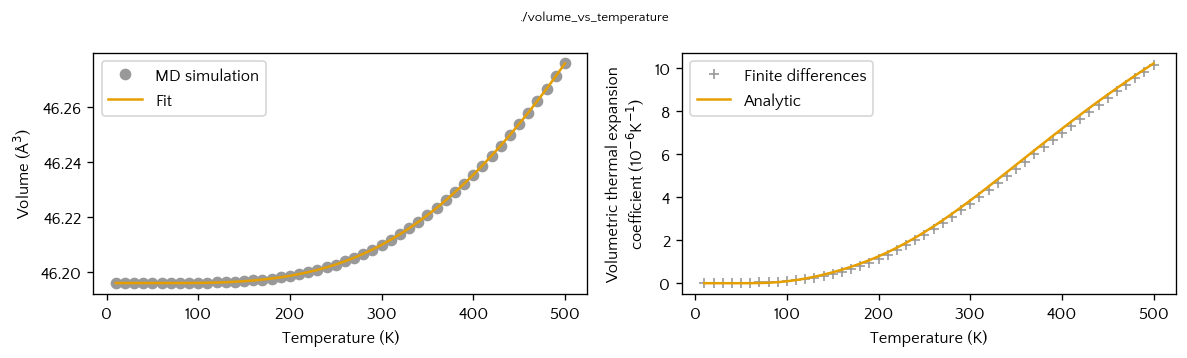

In [2]:

file = './volume_vs_temperature.dat'
print('{0:#^80}'.format(' '+str(file)+' '))
        
M = np.genfromtxt(file)
temperature = M[:,0]
volume = M[:,1]
cte_data = CET_numerical(temperature, volume)

#tenta varios fittings até obter um custo baixo ou atingir o maximo de iteracoes
max_nfits = 10
best_cost = np.inf
cost_threshold = 0.0011
cost = 1.0
for count in range(1,max_nfits+1):
    print(f'Fitting {count}')
    result0 = fit_volume_vs_temperature2(temperature, volume, verbose=True)
    result = second_fit2(temperature, volume, result0, verbose=True)
    params = [result.params[k].value for k in result.params.keys()]
    cost = np.sum(abs(func2min2(result.params, temperature, volume)))
    if cost < best_cost:
        best_cost = cost
        best_params = list(params)
        print(f'    Better solution found. Cost:{cost}')
    if (cost<=cost_threshold):
        print(f'Good cost achieved. Stopping. Final cost: {cost}')
        break
        
if count == max_nfits:
    print(f'Max fittings achieved. Stopping and showing best result. Final cost:{cost}')
    
t_fit = np.array(temperature)
(a0, a1, a2, a3, a4, a5, a6, a7, a8) = (best_params)
v_nominal = volume_fcn2(t_fit,a0, a1, a2, a3, a4, a5, a6, a7, a8)
cte_nominal = CET_fcn2(t_fit,a0, a1, a2, a3, a4, a5, a6, a7, a8)
plot2(temperature, volume, t_fit, v_nominal, cte_data, cte_nominal, file)

v_unc = np.zeros(len(v_nominal))
cte_unc = np.zeros(len(v_nominal))       
with open(file.rstrip('dat')+'fit','w') as f:
    f.write('#{T:5}\t{V:10}\t{Vfit:10}\t{Vunc:10}\t{CET:10}\t{CETfit:10}\t{CETunc:10}\n'.format(T='T(K)',V='V(A3)',Vfit='Vfit(A3)',Vunc='Vunc(A3)',CET='CET(1/K)',CETfit='CETfit(1/K)',CETunc='CETunc(1/K)'))
    for i in range(len(temperature)):
        f.write('{T:5.1f}\t{V:10f}\t{Vfit:10f}\t{Vunc:10f}\t{CET: 10e}\t{CETfit: 10e}\t{CETunc: 10e}\n'.format(T=temperature[i],V=volume[i],Vfit=v_nominal[i],Vunc=v_unc[i],CET=cte_data[i],CETfit=cte_nominal[i],CETunc=cte_unc[i]))



# Paper figure

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def empirical_stoupin(T):
    '''
    Stoupin & Shvyd'ko (2011) ultraprecise empirical equation for the linear CET of diamond
    '''
    b = 3.6e-14
    c = 1.21e-11
    T0 = 212
    DT0 = 47
    
    W = 1.0/(1+np.exp((T-T0)/DT0))
    x = b*W*T**3.0 + c*(1-W)*T**2.0
    
    return x

CET calc: 3.839301e-06 1/K
CET exp: 3.2202218270561792e-06 1/K
Difference: 6.190791729438208e-07 1/K ( 19.22473687192421 %)


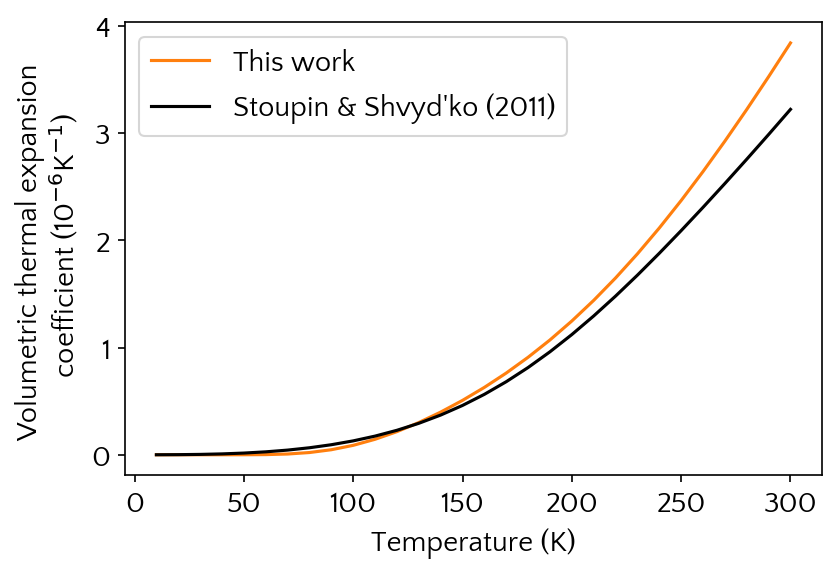

In [9]:

Tfit, alpha_md, alpha_fit = np.loadtxt('volume_vs_temperature.fit',usecols=(0,4,5), unpack=True, max_rows=30)
alpha_exp = 3*empirical_stoupin(Tfit) #We want the volumetric CET 

#Diferecence at 300 K
print('CET calc:', alpha_fit[-1], '1/K')
print('CET exp:', alpha_exp[-1], '1/K')
print('Difference:',alpha_fit[-1]-alpha_exp[-1],'1/K (',100*(alpha_fit[-1]-alpha_exp[-1])/alpha_exp[-1],'%)')

plt.figure(dpi=150)
plt.rcParams['font.sans-serif']="Quattrocento Sans"
plt.rcParams['font.style']="normal"
plt.rcParams['font.size']=14

plt.plot(Tfit,1e6*alpha_fit,label='This work', color='#ff7f0e')
#plt.plot(Tfit,1e6*alpha_md,'x',label='This work')
plt.plot(Tfit,1e6*alpha_exp,label="Stoupin & Shvyd'ko (2011)", color='k')
plt.xlabel('Temperature (K)')
plt.ylabel('Volumetric thermal expansion \n coefficient (10$^{-6}$K$^{-1}$)')
plt.legend()
plt.savefig('diamond_thermal_expansion_vs_temperature.pdf', bbox_inches='tight')
plt.show()